In [1]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
import yaml
#for ipynb
%matplotlib inline

In [2]:
in_dict = {'no-amplitude':'../ATAC_nucleosome_profiling/results'
          }

samples_yaml = '../ATAC_all_fragment_sizes/config/samples.GC.yaml'
metadata_path = '../../metadata/MBC/merged_tables_revisions1/merged_key_metadata.txt'

with open(samples_yaml, 'r') as f:
    samples = yaml.safe_load(f)
samples = samples['samples']
samples = list(samples.keys())  
    
in_files = {}
for group in in_dict.keys():
    in_dir = in_dict[group]
    in_files[group] = []
    for sample in samples:
        in_files[group].append(in_dir+'/'+sample+'/'+sample+'.GC_corrected.coverage.tsv')
    print(group,len(in_files[group]))    

no-amplitude 254


In [3]:
#get columns with coverage data
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

In [4]:
#import data
start_time = time.time()
data = pd.DataFrame()
for group in in_files.keys():
    for i,file in enumerate(in_files[group]):
        if i%100==0:
            print(i,'importing',file,np.round(time.time()-start_time))
        current = pd.read_csv(file,sep='\t')
        current = current[current['site_name'].str.contains('.5e-4_qval')] #for the original analysis, exclude other site cutoffs
        current['site_group'] = group
        data = data.append(current, ignore_index=True)
        

0 importing ../ATAC_nucleosome_profiling/results/MBC_1041_1_ULP/MBC_1041_1_ULP.GC_corrected.coverage.tsv 0.0
100 importing ../ATAC_nucleosome_profiling/results/MBC_1272_ULP/MBC_1272_ULP.GC_corrected.coverage.tsv 1.0
200 importing ../ATAC_nucleosome_profiling/results/MBC_1421_3_ULP/MBC_1421_3_ULP.GC_corrected.coverage.tsv 2.0


In [5]:
#get the subtype data
metadata = pd.read_csv(metadata_path, sep='\t')
metadata_columns = ['sample','patient_id','revisions_ER_status_binary','ulp_wgs_coverage','tumor_fraction','first_passing_sample']
metadata = metadata[metadata_columns]

#merge with data
print(len(data))
data = data.merge(metadata, on = 'sample')
print(len(data['sample'].unique()))


1016
254


In [6]:
data['number_of_sites'].unique()

array([22365,  9930, 18240, 19347])

In [7]:
print(len(data['site_name'].unique()))
data['site_name'].unique()

4


array(['ER_neg_heme.5e-4_qval', 'ER_pos_heme.5e-4_qval',
       'ER_pos_specific.5e-4_qval', 'ER_neg_specific.5e-4_qval'],
      dtype=object)

In [8]:
#get the key columns
data = data[metadata_columns+['site_name','correction','site_group',
                              'central_coverage','mean_coverage']+str_plot_columns]
print(len(data))

site_groups = in_dict.keys()

site_names = data['site_name'].unique()

for group,df in data.groupby('site_group'):
    print(group,len(df['site_name'].unique()))

    #df.to_csv('merged_data/'+group+'_data_with_features.txt', sep='\t', index=False)
    
    #reformat for logistic regression
    reformatted = df[metadata_columns+['site_name','site_group','central_coverage','mean_coverage']]
    reformatted = reformatted.set_index(metadata_columns+['site_group','site_name']).unstack()
    new_column_names = []
    for item in reformatted.columns.values:
        new_column_names.append('_'.join(item))
    reformatted.columns = new_column_names
    reformatted.to_csv('merged_data/'+group+'_reformatted.txt', sep='\t')
    print(reformatted.shape)

1016
no-amplitude 4
(254, 8)


In [9]:
reformatted.head()

,,,,,,,central_coverage_ER_neg_heme.5e-4_qval,central_coverage_ER_neg_specific.5e-4_qval,central_coverage_ER_pos_heme.5e-4_qval,central_coverage_ER_pos_specific.5e-4_qval,mean_coverage_ER_neg_heme.5e-4_qval,mean_coverage_ER_neg_specific.5e-4_qval,mean_coverage_ER_pos_heme.5e-4_qval,mean_coverage_ER_pos_specific.5e-4_qval
sample,patient_id,revisions_ER_status_binary,ulp_wgs_coverage,tumor_fraction,first_passing_sample,site_group,,,,,,,,
MBC_1041_1_ULP,MBC_1041,+,0.149816,0.4890,1.0,no-amplitude,0.88956,0.97736,0.91270,0.92692,0.97737,1.00038,0.94830,0.97381
MBC_1041_3_ULP,MBC_1041,+,0.163681,0.0760,NaN,no-amplitude,0.93012,1.02387,0.98231,1.02736,0.97471,1.00803,0.99867,0.99709
MBC_1041_4_ULP,MBC_1041,+,0.215894,0.4467,NaN,no-amplitude,0.92708,1.00976,0.92128,0.93546,0.97336,0.98699,0.97431,0.97159
MBC_1042_1_ULP,MBC_1042,+,0.106322,0.1347,NaN,no-amplitude,0.91718,1.00207,0.90677,1.00502,0.97745,0.99692,0.98593,0.99564
MBC_1042_2_ULP,MBC_1042,+,0.259052,0.7889,1.0,no-amplitude,0.98523,1.01039,0.85963,0.88999,0.96123,0.99359,0.91127,0.93230


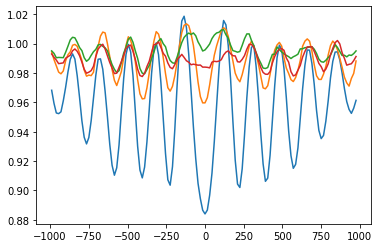

In [10]:
#plot
for site_name in data['site_name'].unique():
    current = data[data['site_name']==site_name][str_plot_columns].mean()
    plt.plot(plot_columns,current, label=site_name)
    
# plt.legend()

